# 1.1 Теоретический материал - Линейные регрессионные модели
Линейная регрессия  
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.  
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.  

**Функция потерь - метод наименьших квадратов**  
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.  
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.  

**Задача экраполяции**  
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:  

**numpy - numpy.linalg.lstsq**  
**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).
# 1.1.1 Пример
**Задача:**  
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.  
**Решение:**

0.9999999999999999 -0.9499999999999997


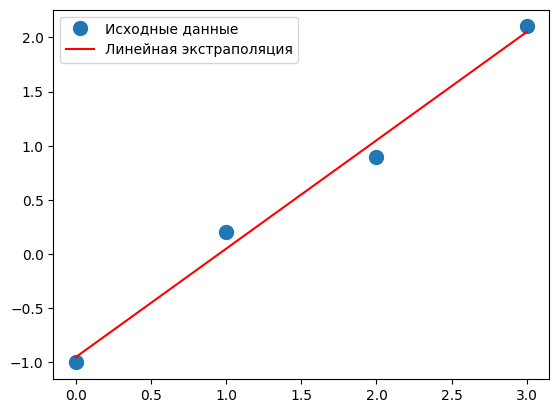

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

A = np.vstack([x,np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

# 1.1.2 Пример
**Задача:**  
Пусть 𝑥,𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома 𝑎,𝑏,𝑐 по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.  
**Решение:**

[-0.24406257  0.00923677 -6.74720745  2.28971479 -5.52200553  1.52792125
  0.54715587 -1.21889905  1.13610935 -0.44215134  2.91008379]
[21.95660426 17.19827926 10.12028155  4.44680092  3.58795865 -0.15583598
 -0.3407875   7.59700681  8.69235224 12.8810493  25.8093476 ]


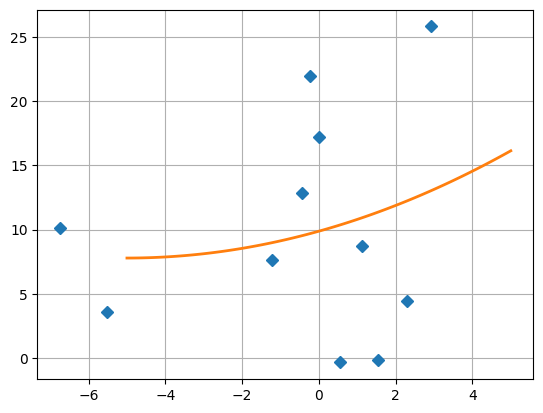

In [ ]:
from numpy import *
from numpy.random import *

delta=10
x=linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

x = fromfile('x_data.txt',float,sep='\n')
y = fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

m = vstack((x**2,x,ones(11))).T
s =np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

# 1.1.3 Пример
**Задача:**  
По данным предыдущего примера постройте экстраполяуионный полином третьего порядка.  
**Решение:**

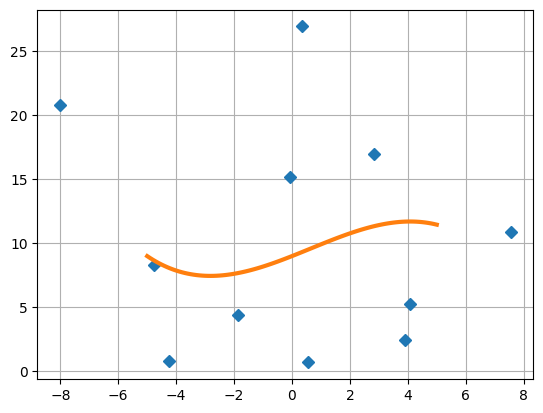

In [ ]:
from numpy import *
from numpy.random import *

delta=10
x=linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

m = vstack((x**3,x**2,x,ones(11))).T

s =np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3й степени.png')

**Задача**  
Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и  ретьей степени.  
**Решение:**

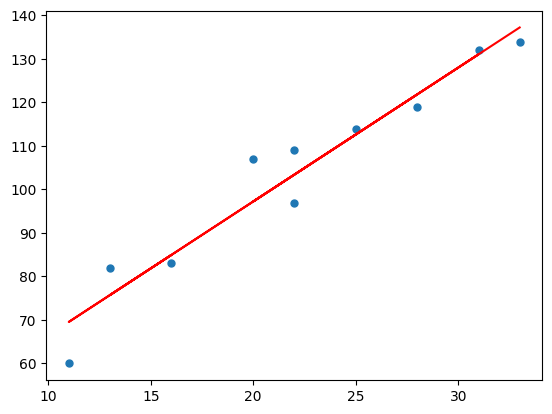

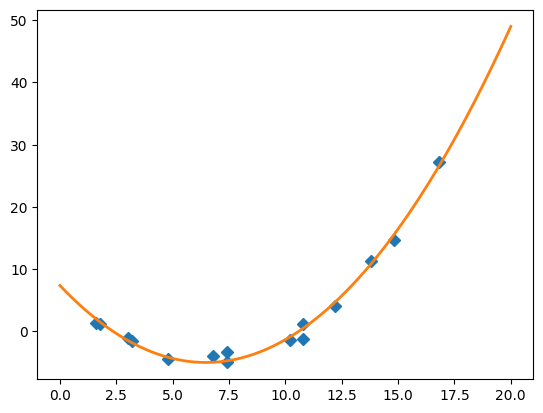

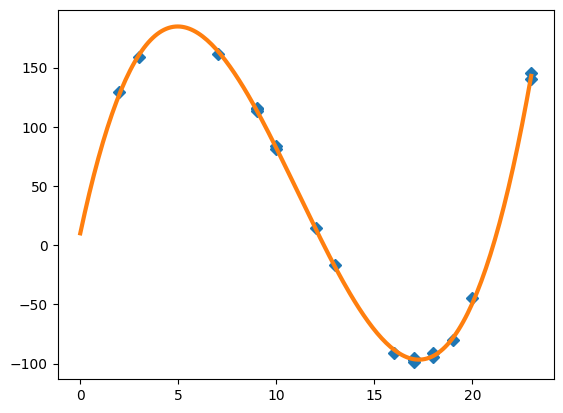

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
def gen_p1(ndots, e, a, b):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x+b + e*random.randint(0, 7) for x in x])
    return x, y


def gen_p2(ndots, e, a, b, c):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x**2 +b*x + c + e*random.randint(0, 7) for x in x])
    return x, y

def gen_p3(ndots, e, a, b, c, d):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x**3 +b*x**2 + c*x + d + e*random.randint(0, 7) for x in x])
    return x, y

x, y = gen_p1(10, 4, 3, 19)

m1 = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(m1, y, rcond=None)[0]
plt.plot(x,y, 'o', label='initial data', markersize=5)
plt.plot(x, m*x + c, 'r', label='linear')
plt.show()

x, y = gen_p2(15, 0.4, 0.3, -4, 7)

m = np.vstack((x**2, x,np.ones(15))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = np.linspace(0,20,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**2 + s[1]*x_prec + s[2],'-',lw=2)
plt.show()


x, y = gen_p3(20, 1, 0.3, -10, 77, 8)

m = np.vstack((x**3,x**2, x,np.ones(len(x)))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = np.linspace(0,max(x),200)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=3)
plt.show()

# 1.1.4 Пример
**Задача:**  
Необходимо проверить гипотезу, что наша точечно заданная функция ложится на кривую вида $f(x,b)=b_0+b_1exp(-b2x^2)$  
**Решение:**

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.04358871 0.96870279 1.04038961 1.03740676 0.96389122 0.8517107
 0.86600526 0.84037174 0.797122   0.80963016 0.62355111 0.62936668
 0.55734988 0.63734281 0.44070804 0.37673661 0.49141193 0.46922007
 0.35531824 0.32872119 0.37850895 0.28428462 0.30620471 0.33913045
 0.32884799 0.31620962 0.30522664 0.25523909 0.27300163 0.30205122
 0.29211772 0.26801272 0.23140084 0.3375853  0.16001165 0.37606523
 0.19881749 0.34402018 0.26287513 0.255

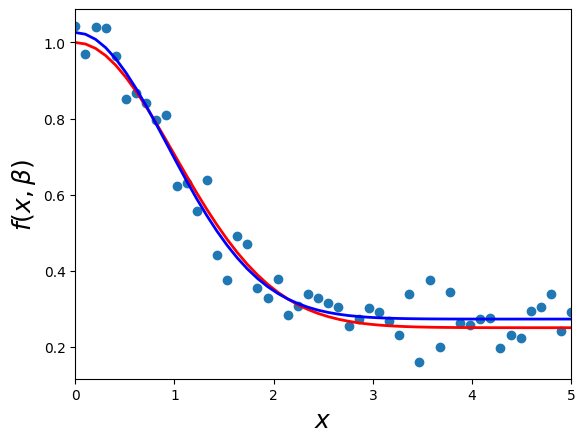

In [ ]:
from scipy.optimize import curve_fit
import scipy as sp
beta = (0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)

xdata = np.linspace(0,5,50)
y = f(xdata,*beta)
ydata = y + 0.05*np.random.randn(len(xdata))

print(xdata)
print(ydata)

beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

# 1.1.5 Пример
**Задача:**  
Необходимо проверить гипотезу, что наша точечтно заданная функция ложится на кривые вида:  
1. $f(x,b) = b_0+b_1x$  
2. $f(x,b) = b_0+b_1x+b_2x^2$  
3. $f(x,b) = b_0+b_1ln(x)$  
4. $f(x,b) = b_0x^{b_1}$  
**Решение:**

[0.25832806 0.7482058 ]
0.00019996626195311793
0.17583240375664716


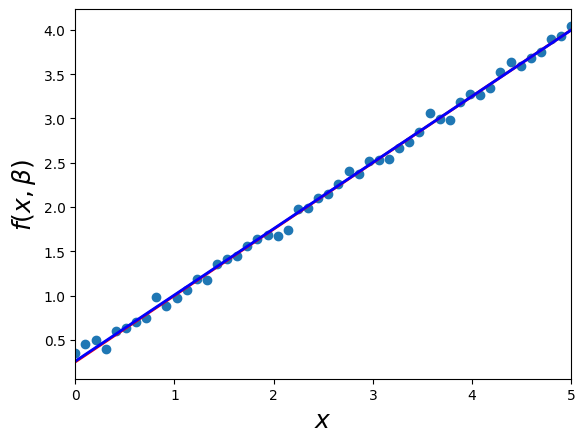

[0.25916238 0.75297417 0.49739993]
0.00015384842517039872
0.12829348044047048


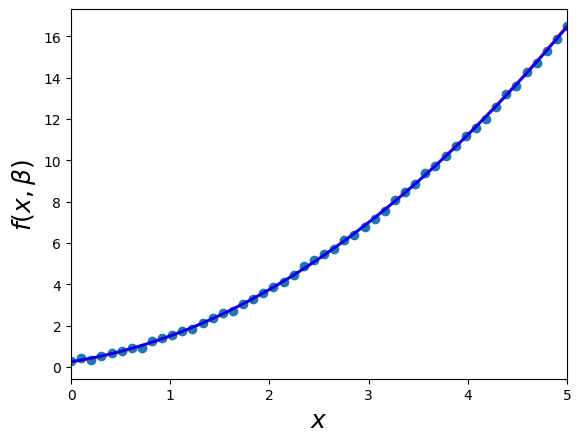

[0.98981145 2.00722777]
2.997039219857793
0.09705647467841798


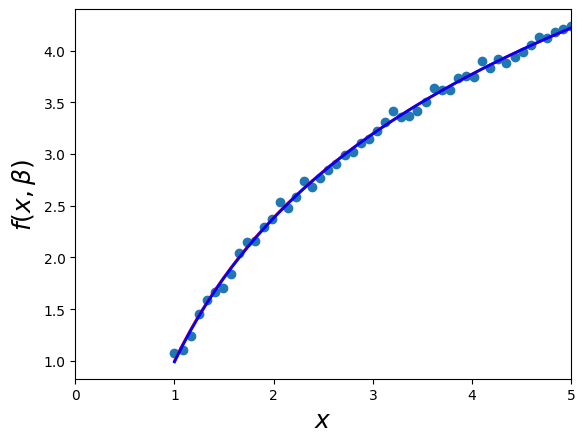

[1.00424212 1.99640138]
3.0006435073917146
0.14834936204396418


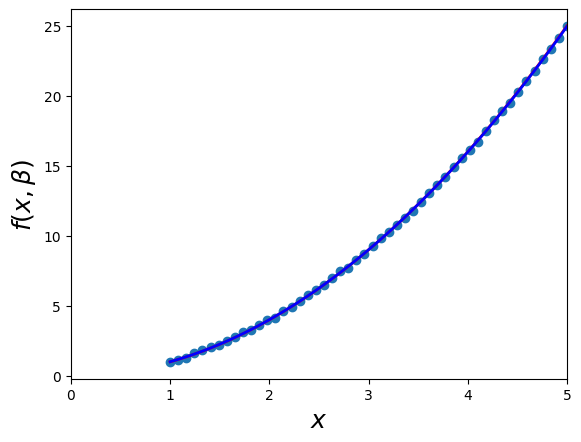

In [ ]:
#1
beta = (0.25,0.75)
def f(x,b0,b1):
    return b0+b1*x

xdata = np.linspace(0,5,50)

y = f(xdata,*beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

#2
beta = (0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*x+b2*x**2

xdata = np.linspace(0,5,50)

y = f(xdata,*beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

#3
beta = (1,2)
def f(x,b0,b1):
    return b0+b1*np.log(x)

xdata = np.linspace(1,5,50)

y = f(xdata,*beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_opt)
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

#4
beta = (1,2)
def f(x,b0,b1):
    return b0*x**b1

xdata = np.linspace(1,5,50)

y = f(xdata,*beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_opt)
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

**Задание:**  
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.  
**Решение:**

[1.78275735 4.33388195]
0.017539281034758263
7.907211834926616


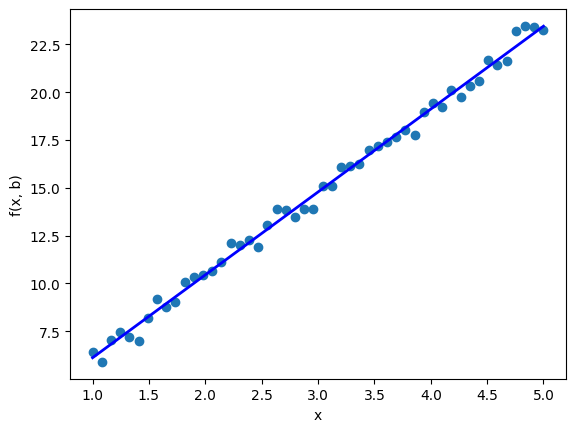

[2.00302017 4.17758788 1.29399568]
0.02697347736483673
3.4741318980515077


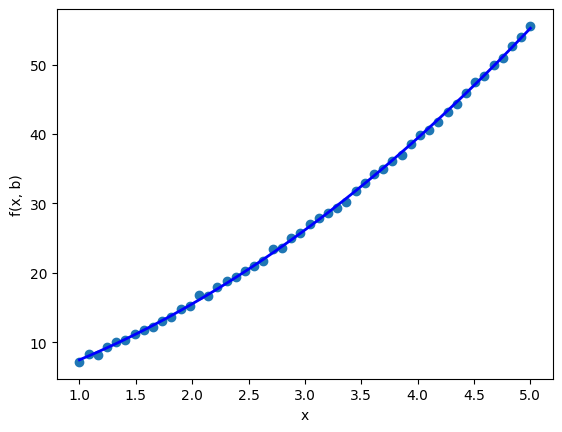

[1.29948045 4.87036518]
0.017654445394823623
40.82486875600057


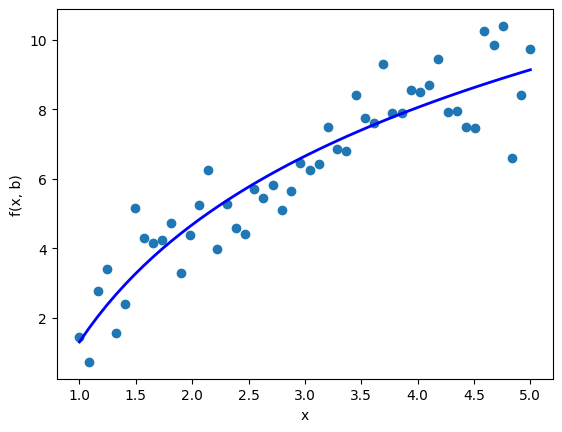

[2.00469975 4.29838995]
1.1810579035215799e-05
27.964866057477998


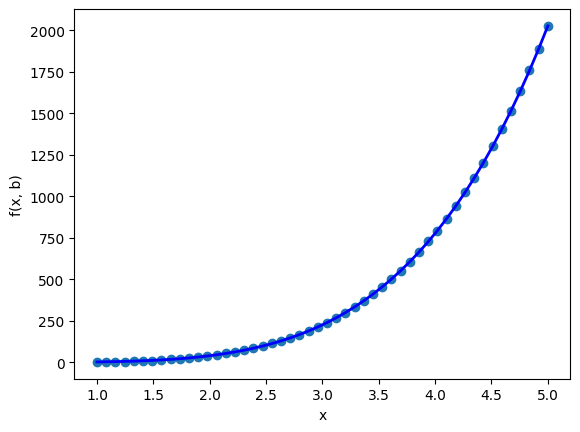

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
# 1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
# 2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥
# 2
# 3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
# 4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥**b1
b_d = (2, 4.3)
def f1(x, b0, b1):
    return b0 + b1*x
def f2(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2
def f3(x, b0, b1):
    return b0 + b1*np.log(x)
def f4(x, b0, b1):
    return b0 * np.power(x,b1)

x_val = np.linspace(1, 5, 50)
y = f1(x_val, *b_d)
y_val = y + 0.48*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f1, x_val, y_val)
print(beta_opt)

lin_err = sum(beta_corv[0])
print(lin_err)
sq_err = sum((y_val - f1(x_val, *beta_opt))**2)
print(sq_err)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f1(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()


y = f2(x_val, *(*b_d, 1.27))
y_val = y + 0.28*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f2, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f2(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f2(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

y = f3(x_val, *b_d)
y_val = y + 0.98*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f3, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f3(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f3(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()


y = f4(x_val, *b_d)
y_val = y + 0.7*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f4, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f4(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f4(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

# 1.2 Теоретический материал - Задачи регрессии
**Линейная регрессия** - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.  

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

# 1.2.1 Пример
**Задача:**  
Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn  
**Решение:**

(20, 2)


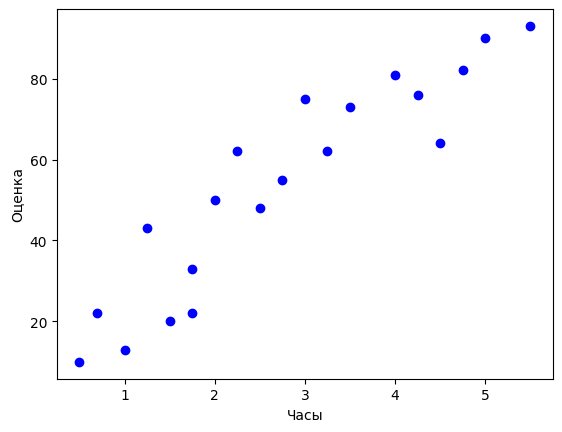

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {"Учебное время":[0.50,0.70,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
          "Оценка":[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter(dataset["Учебное время"],dataset["Оценка"],color='b',label="данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:  
**Решение:**

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.7 ]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:  
**Решение:**

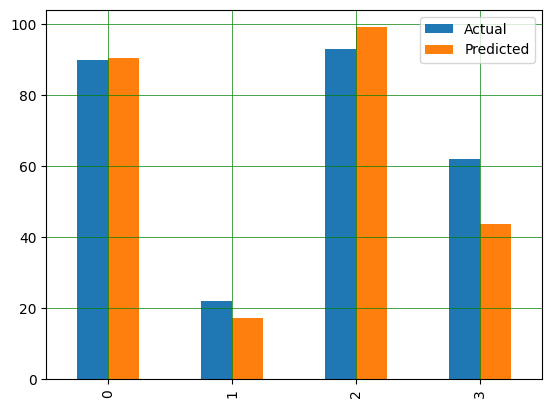

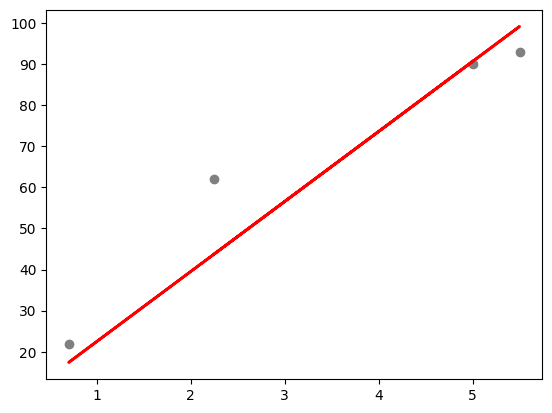

In [ ]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

**Задание:**  
Постройте модель линейной регрессии для произвольных данных из двустолбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:  
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).  
Найдите коэффициенты линии регрессии. Постройте прогноз.  
**Решение:**

26780.09915062818
[9312.57512673]


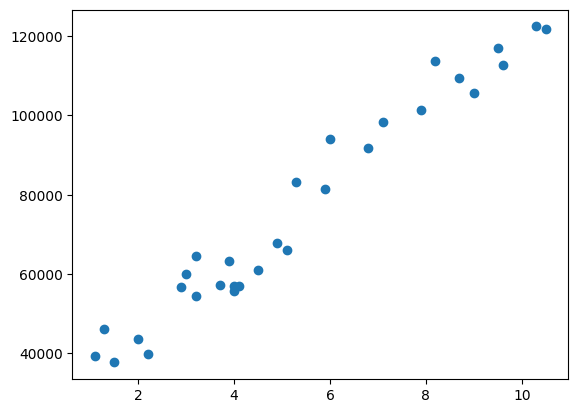

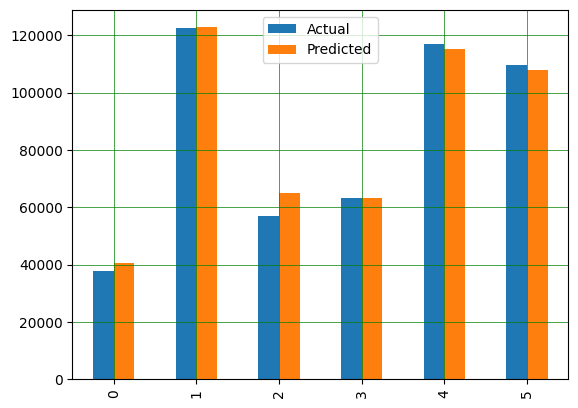

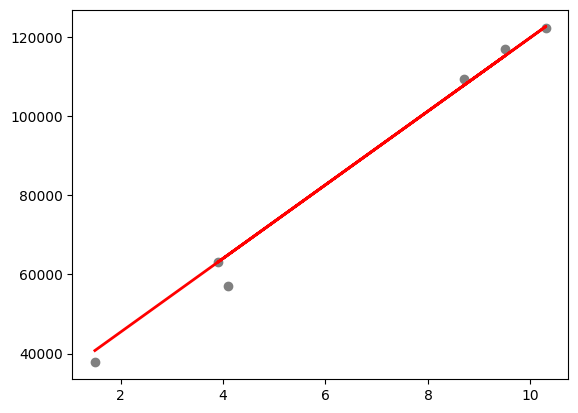

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
plt.scatter(data['YearsExperience'],data["Salary"])
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

y_pred = reg.predict(x_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

# 1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.
# 1.3.1 Пример
**Задача:**  
Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.  
**Решение:**

In [ ]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
x = np.transpose(x)
x = np.c_[x,np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x,y,rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки scikit-learn.  
Рассмотрим пример.
# 1.3.2 Пример
**Задача:**  
Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки scilit-learn.  
**Решение:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns = {0:'y'},inplace = False)
df2 = df2.rename(columns = {0:'x1',1:'x2',2:'x3'},inplace=False)

frames = [df1,df2]
dataset = pd.concat([df1,df2],axis=1,join='inner')
dataset.head()

print(dataset.shape)
dataset.describe()

x = dataset[['x1','x2','x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train,y_train)

coeff_df = pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(x_test)
df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
df

print('Mth Squared Error:',metrics.mean_squared_error(y_test,y_pred))

(23, 4)
Mth Squared Error: 1.3272699242343076


# Задание
**Задача:**  
Постройте модель множественной линейной регрессии для произвольных ланных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галонов) в 48 штатах США или набор данных о качетсве красного вина (1) и (2) соответственно. Найлите коэффициенты множественной регрессии. Постройте прогноз.  
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv  
**Решение:**

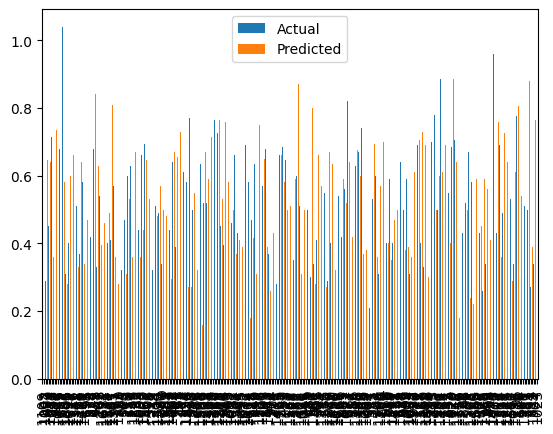

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data
data.describe()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data.iloc[:, 1], test_size=0.2,random_state=0)
regress = LinearRegression()
regress.fit(x_train,y_train)
coeff_df = pd.DataFrame(regress.coef_,data.iloc[:,:-1].columns,columns=['Coefficient'])
coeff_df

y_pred = regress.predict(x_test)
df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
df
df.plot(kind='bar')
plt.show()

# Задание
**Задача:**  
Экспериментально получены N - значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.  
**Решение:**

[3.  3.2 3.4 3.6 3.8 4. ] [6. 2. 6. 4. 3. 4.]
-1.2857142857142867 8.66666666666667
2.2321428571426667 -16.910714285713148 35.74999999999842


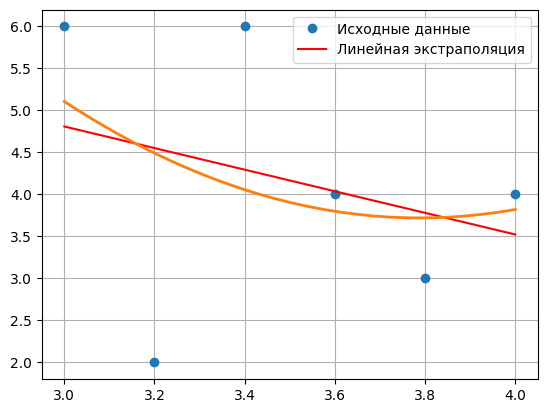

In [ ]:
import numpy as np
from numpy import vstack,ones,linspace
import matplotlib.pyplot as plt

x = [3.0,3.2,3.4,3.6,3.8,4.0]
y = [6.0,2.0,6.0,4.0,3.0,4.0]

new_y = np.array(y)
new_x = np.array(x)
print(new_x,new_y)
A = np.vstack([new_x,np.ones(len(new_x))]).T
A
m,c = np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

plt.plot(new_x,new_y,'o',label='Исходные данные')
plt.plot(new_x,m*new_x+c,'r',label='Линейная экстраполяция')
plt.legend()

m = vstack([new_x**2,new_x,ones(len(new_x))]).T
s = np.linalg.lstsq(m,new_y,rcond=None)[0]
x_prec = linspace(3,4,100)

plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
print(s[0],s[1],s[2])